In [107]:
import sys,os
import pandas as pd
# read csv file
fname = "/Users/sunyijia/Documents/workResource/飞猪推荐/酒店业务/酒店推荐-排序模型线上实验_0325.xlsx"

df = pd.read_excel(fname, sheet_name=u"online_auc分析")

mindate = 20210324
maxdate = 20210329
exp_data = df[df["ds"] >= mindate]
exp_data = exp_data[exp_data["ds"] <= maxdate]
print(exp_data.head())

abid_group = exp_data.groupby(by = ["ab_id"])
# print picture

         ab_id  valid_search_cnt      pv  label_cnt  ctr_gauc   ctr_auc  \
8   5448_25331             26685  305110      47186  0.635488  0.612406   
9   5448_25433             14786  170930      25971  0.634565  0.603949   
10  5448_26164             14477  166285      25211  0.634522  0.605798   
11  5448_26167              6210   73297      11053  0.631863  0.610864   
12  5448_25331             19866  236654      35714  0.614830  0.613248   

    rtp_ctr_gauc  rtp_ctr_auc  mlrtp_ctr_gauc  mlrtp_ctr_auc  mlms_ctr_gauc  \
8       0.640369     0.649970        0.649700       0.652183       0.640667   
9       0.641699     0.645594        0.648474       0.648857       0.643740   
10      0.640861     0.651558        0.648939       0.654319       0.641088   
11      0.640777     0.651216        0.650875       0.651457       0.637449   
12      0.602286     0.660098        0.658021       0.653918       0.662771   

    mlms_ctr_auc        ds Unnamed: 13  
8       0.651015  20210324       

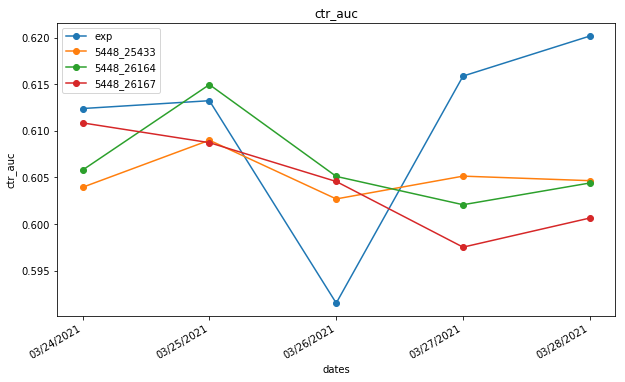

In [90]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# 设置x轴
plt.figure(figsize=(10, 6))
ylabel = "ctr_auc"
for groupname, gdata in abid_group:
    dates = [str(d) for d in abid_group.get_group(groupname)["ds"]]
    xs = [datetime.strptime(d, '%Y%m%d').date() for d in dates]
    y2 = abid_group.get_group(groupname)[ylabel]
    if groupname == "5448_25331":
        groupname = "exp"
    plt.plot(xs, y2, "-o", label = groupname)
plt.xlabel("dates")
plt.ylabel(ylabel)
plt.title(ylabel)
plt.legend()
# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()
plt.show()

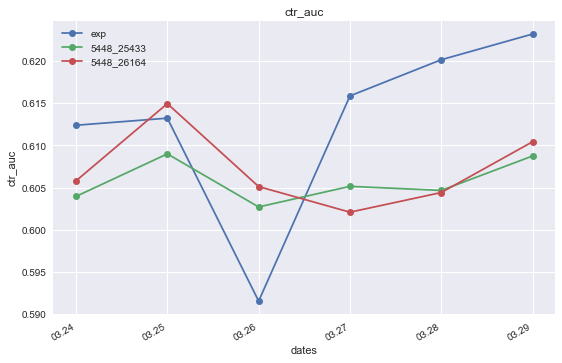

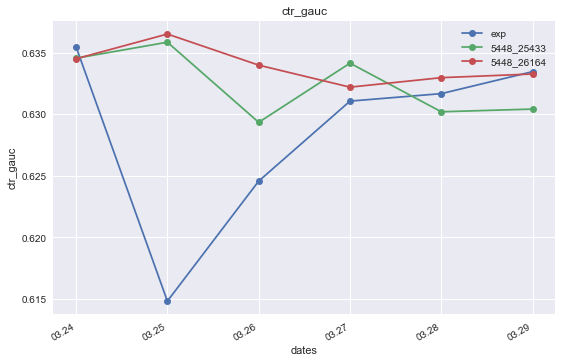

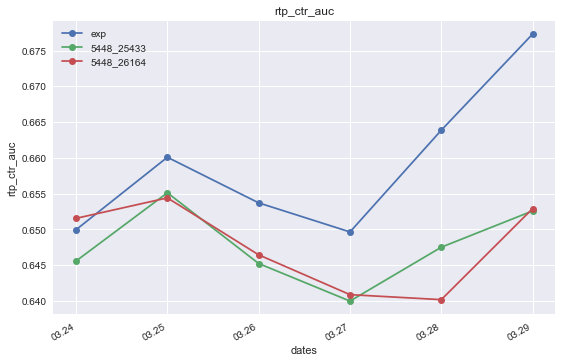

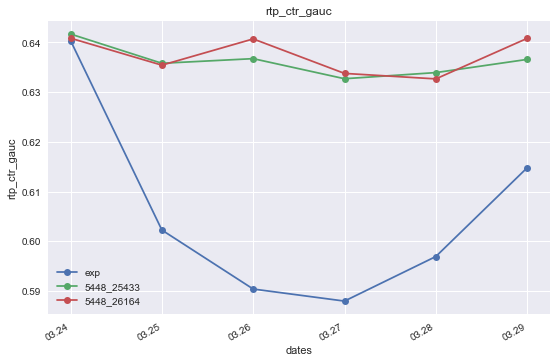

In [112]:
plt.style.use('seaborn')

for ylabel in ["ctr_auc", "ctr_gauc", "rtp_ctr_auc", "rtp_ctr_gauc"]:
    # 设置x轴
    plt.figure(figsize=(9, 6))
    # 配置横坐标
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    for groupname, gdata in abid_group:
        if groupname == "5448_26167":
            continue
        dates = [str(d) for d in abid_group.get_group(groupname)["ds"]]
        xs = [datetime.strptime(d, '%Y%m%d').date() for d in dates]
        y2 = abid_group.get_group(groupname)[ylabel]
        if groupname == "5448_25331":
            groupname = "exp"
        plt.plot(xs, y2, "-o", label = groupname)
    plt.xlabel("dates")
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(ylabel)
    plt.gcf().autofmt_xdate()
    plt.show()


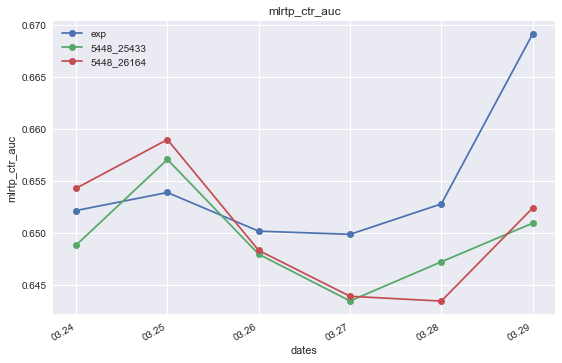

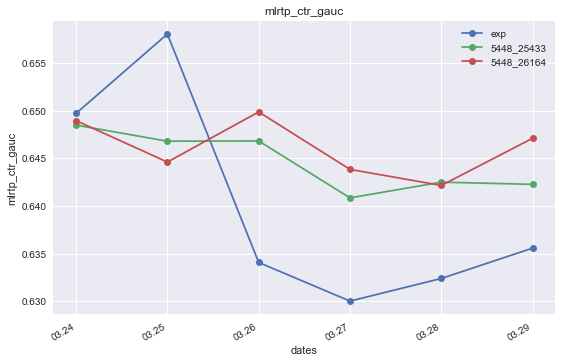

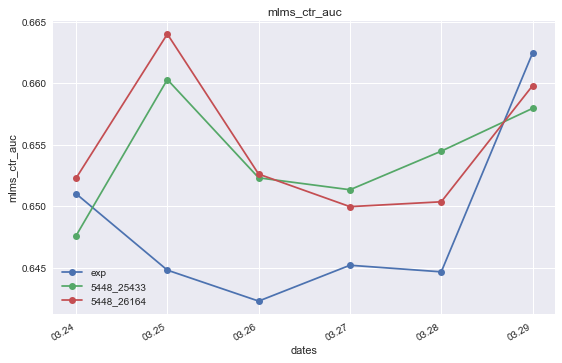

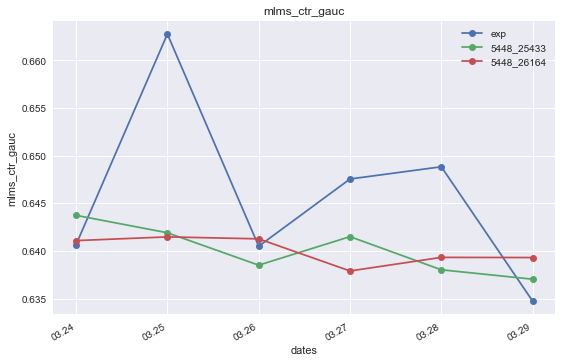

In [111]:

for ylabel in ["mlrtp_ctr_auc", "mlrtp_ctr_gauc", "mlms_ctr_auc", "mlms_ctr_gauc",]:
    # 设置x轴
    plt.figure(figsize=(9, 6))
    # 配置横坐标
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    for groupname, gdata in abid_group:
        if groupname == "5448_26167":
            continue
        dates = [str(d) for d in abid_group.get_group(groupname)["ds"]]
        xs = [datetime.strptime(d, '%Y%m%d').date() for d in dates]
        y2 = abid_group.get_group(groupname)[ylabel]
        if groupname == "5448_25331":
            groupname = "exp"
        plt.plot(xs, y2, "-o", label = groupname)
    plt.xlabel("dates")
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(ylabel)
    plt.gcf().autofmt_xdate()
    plt.show()